# Project: No-Show Medical Appointments Dataset Exploration

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>The data set that I selected for analysis is titled 'No-show Appointments' and comes from Kaggle. The data describes 100k medical appointments in Brazil and is focused on whether or not patients showed up for their appointment. Some of the columns in the data are demographic: scholarship (whether or not the patient is on welfare), gender, age. Some of the columns describe patient health status: alchoholism, diabetes, hipertension. There is information around the hospital neighborhood, the day the appointment was scheduled on, and the day the appointment was scheduled for. The information also includes whether or not the patient recieved an SMS text about their appointment.

>This is an exploratory data analysis to understand different characteristics and their relationship to keeping or missing an appointment. This analysis is strictly descriptive and does not incude hypothesis tests, regression analysis, or other forms of data modeling. My questions are what, if any, demographic patterns can be found in kept vs. missed appointments. What, if any, diseases were present more often in patients who missed appointments. And the amount of patients who recieved an SMS text about their appointments in the kept vs. missed group. 

In [1]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('appt_data.csv', encoding='latin1')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Understanding and cleaning the dataset

In [4]:
#checking data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#checking for duplicated data
sum(df.duplicated())

0

In [6]:
#checking for the number of unique values in each column
df.nunique()

PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
#pull descriptive stats for the columns in the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
#Checking to see how many people are over 100
over100 = df.query('Age >= 100')
over100

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762950e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196320e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196320e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196320e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196320e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
79270,9.739430e+12,5747809,M,2016-05-30T16:21:56Z,2016-05-31T00:00:00Z,100,TABUAZEIRO,0,0,0,0,1,0,No
79272,9.739430e+12,5747808,M,2016-05-30T16:21:56Z,2016-05-31T00:00:00Z,100,TABUAZEIRO,0,0,0,0,1,0,No
90372,2.342840e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
92084,5.578310e+13,5670914,F,2016-05-06T14:55:36Z,2016-06-03T00:00:00Z,100,ANTÌÓNIO HONÌÒRIO,0,0,0,0,0,1,No
97666,7.482350e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÌÄO JOSÌä,0,1,0,0,0,1,No


In [9]:
#find which records have age -1
neg_age = df.query('Age == -1')
neg_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÌÄO,0,0,0,0,0,0,No


#### Findings so far:
> Our dataset has 110,527 observations (with no missing data and no duplicates) and 14 data columns, something might need to be done to the PatientId column in order to get rid of scientific notation.

> The minimum age is -1, which will need to be removed from the dataset. I also checked ages over 100 to make sure
> they seemed legitimate. The highest age was 115, and was the same patient seen multiple times, leading me to 
> believe this wasn't a typo. The columns ScheduledDay and AppointmentDay will need to be formatted to a date-time
> format in order to work with.

>One thing to note is that ScheduledDay has 103,549 unique values, and AppointmentDay has 26. Upon closer inspection we see that the data form ScheduledDay is specific to the second, while AppointmentDay is specific to the day. That won't affect this particular analysis, but it is something could be fixed if the data was in a SQL database.

<a id='cleaning'></a>
## Data Cleaning

In [3]:
#drop columns we will not be using
df.drop(['PatientId', 'AppointmentID', 'Handcap', 'Neighbourhood', 'AppointmentDay', 'ScheduledDay'], axis=1, inplace=True)
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
0,F,62,0,1,0,0,0,No
1,M,56,0,0,0,0,0,No
2,F,62,0,0,0,0,0,No
3,F,8,0,0,0,0,0,No
4,F,56,0,1,1,0,0,No


In [46]:
#dropping the record with age == -1 and verifying that there are no negative age numbers
df.drop(df.index[99832], inplace=True)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 8 columns):
Gender          110526 non-null object
Age             110526 non-null int64
Scholarship     110526 non-null int64
Hipertension    110526 non-null int64
Diabetes        110526 non-null int64
Alcoholism      110526 non-null int64
SMS_received    110526 non-null int64
No-show         110526 non-null object
dtypes: int64(6), object(2)
memory usage: 7.6+ MB


,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

### Understanding the data visually.
> The next several code blocks will generate visualizations to describe the data

In [4]:
#bar chart and counts for no-show
df['No-show'].value_counts(normalize=True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

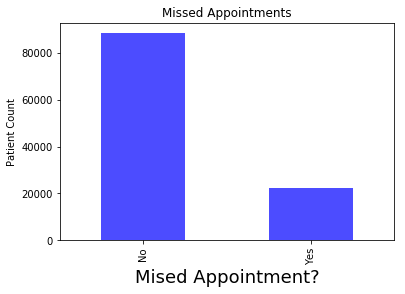

In [105]:
no_show = df['No-show'].value_counts()
no_show.plot(kind='bar', title='Missed Appointments', color='blue', alpha = 0.7)
plt.xlabel('Mised Appointment?', fontsize=18)
plt.ylabel('Patient Count');

In [92]:
#bar chart and counts for gender
df['Gender'].value_counts(normalize=True)

F    0.64998
M    0.35002
Name: Gender, dtype: float64

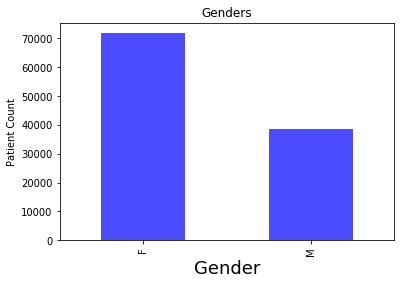

In [106]:
gender = df['Gender'].value_counts()
gender.plot(kind='bar', title='Genders', color='blue', alpha = 0.7)
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Patient Count');

In [94]:
#bar chart and counts for alcoholism
df['Alcoholism'].value_counts(normalize=True)

0    0.9696
1    0.0304
Name: Alcoholism, dtype: float64

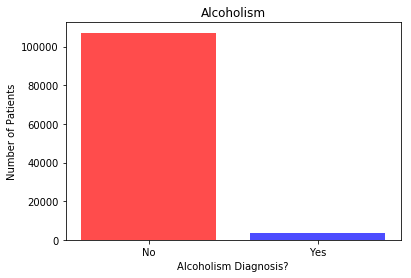

In [70]:
no = sum(df['Alcoholism'] == 0)
yes = sum(df['Alcoholism'] == 1)
colors = ['red', 'blue']
locations = [1,2]
heights = [no, yes]
labels = ['No', 'Yes']
plt.bar(locations, heights, color=colors, tick_label=labels, alpha=0.7)
plt.title('Alcoholism')
plt.xlabel('Alcoholism Diagnosis?')
plt.ylabel('Number of Patients');

In [96]:
#bar chart and counts for hypertension
df['Hipertension'].value_counts(normalize=True)

0    0.802751
1    0.197249
Name: Hipertension, dtype: float64

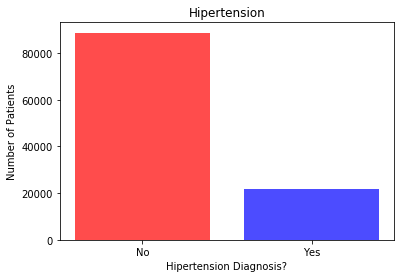

In [71]:
no = sum(df['Hipertension'] == 0)
yes = sum(df['Hipertension'] == 1)
colors = ['red', 'blue']
locations = [1,2]
heights = [no, yes]
labels = ['No', 'Yes']
plt.bar(locations, heights, color=colors, tick_label=labels, alpha=0.7)
plt.title('Hipertension')
plt.xlabel('Hipertension Diagnosis?')
plt.ylabel('Number of Patients');

In [98]:
#bar chart and counts for diabetes
df['Diabetes'].value_counts(normalize=True)

0    0.928134
1    0.071866
Name: Diabetes, dtype: float64

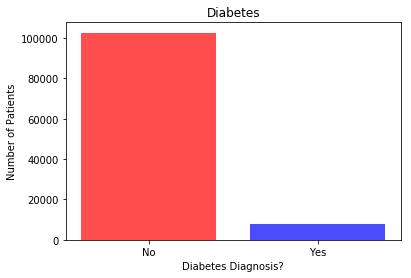

In [72]:
no = sum(df['Diabetes'] == 0)
yes = sum(df['Diabetes'] == 1)
colors = ['red', 'blue']
locations = [1,2]
heights = [no, yes]
labels = ['No', 'Yes']
plt.bar(locations, heights, color=colors, tick_label=labels, alpha=0.7)
plt.title('Diabetes')
plt.xlabel('Diabetes Diagnosis?')
plt.ylabel('Number of Patients');

In [100]:
#bar chart and counts for scholarship (welfare)
df['Scholarship'].value_counts(normalize=True)

0    0.901733
1    0.098267
Name: Scholarship, dtype: float64

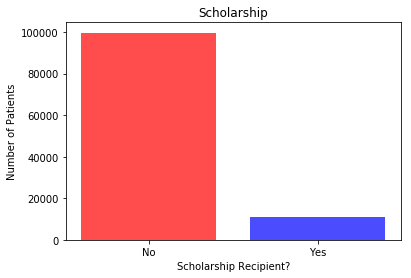

In [73]:
no = sum(df['Scholarship'] == 0)
yes = sum(df['Scholarship'] == 1)
colors = ['red', 'blue']
locations = [1,2]
heights = [no, yes]
labels = ['No', 'Yes']
plt.bar(locations, heights, color=colors, tick_label=labels, alpha=0.7)
plt.title('Scholarship')
plt.xlabel('Scholarship Recipient?')
plt.ylabel('Number of Patients');

In [102]:
#bar chart and counts for sms recieved
df['SMS_received'].value_counts(normalize=True)

0    0.678969
1    0.321031
Name: SMS_received, dtype: float64

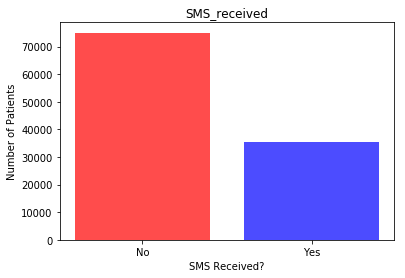

In [74]:
no = sum(df['SMS_received'] == 0)
yes = sum(df['SMS_received'] == 1)
colors = ['red', 'blue']
locations = [1,2]
heights = [no, yes]
labels = ['No', 'Yes']
plt.bar(locations, heights, color=colors, tick_label=labels, alpha=0.7)
plt.title('SMS_received')
plt.xlabel('SMS Received?')
plt.ylabel('Number of Patients');

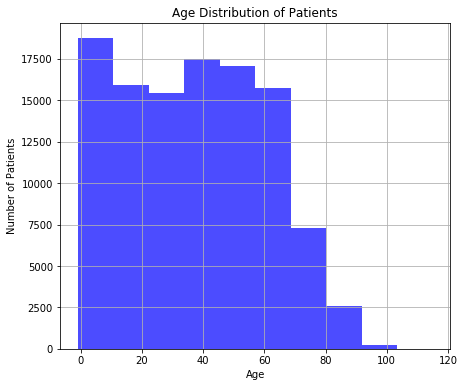

In [5]:
#histogram for age distribution
df['Age'].hist(figsize=(7,6), color='blue', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution of Patients');

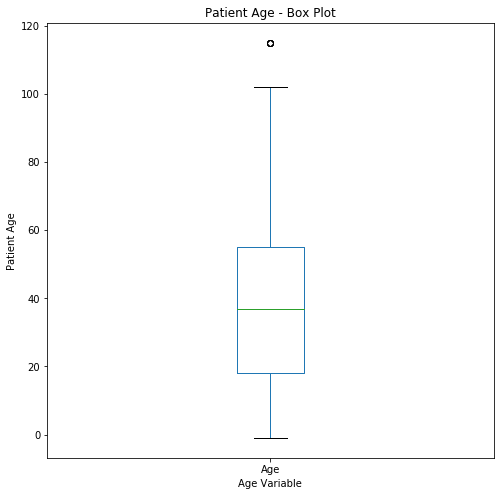

In [6]:
#box plot for age distribution
df['Age'].plot(kind='box', figsize=(8,8))
plt.xlabel('Age Variable')
plt.ylabel('Patient Age')
plt.title('Patient Age - Box Plot');

### Discussion of descriptive visualizations
> The first thing we take note of in our sample is that 80% of patients did show up for their appointments and only 
> 20% did not show up. Demographically, our sample is made up of 65% females and 35% males. The age distribution skews
> right (younger), with the median being 37 years old, and a range of 0 to 115 years. About 10% of the patients are
> enrolled in the Brazilian Welfare Program (scholarship variable). When it comes to disease, ~8% of patients have a 
> diabetes diagnosis, ~20% have hypertension, and ~3% have alcoholism. Finally, around 32% of patients recieved an SMS > message about their appointment.

### What is the relationship between age and missed appointments?

In [5]:
#split into two data frames - one for No-show = No, one for No-show = Yes
df_n = df[df['No-show'] == 'No']
df_n['Age'].describe()

count    88208.000000
mean        37.790064
std         23.338878
min         -1.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

In [6]:
df_y = df[df['No-show'] == 'Yes']
df_y['Age'].describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

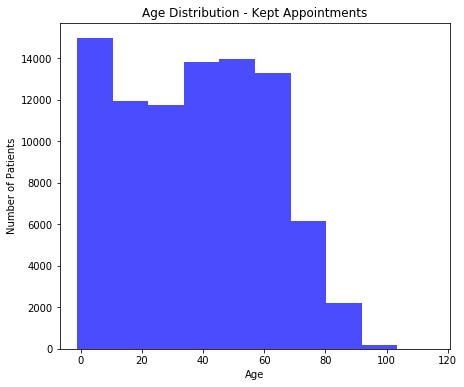

In [10]:
df_n['Age'].plot(kind='hist', color = 'blue', figsize=(7,6), alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution - Kept Appointments');

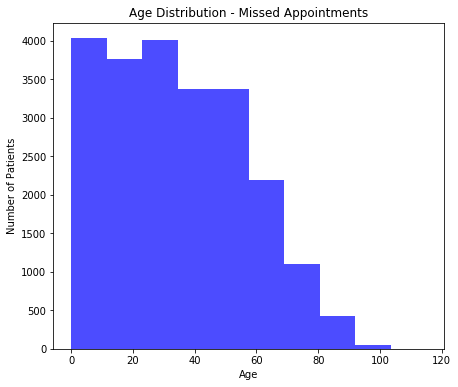

In [103]:
df_y['Age'].plot(kind='hist', color='blue', figsize=(7,6), alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution - Missed Appointments');

##### We notice that the mean age for those who miss appointments is 34 years, while the mean for those who did not miss appointments was 37. The Median shows an even bigger difference - with the median age of patients who miss appointments being 33 and the median for those who kept their appointment being 38. Overall the histogram of age of patients who missed appointments skews heavily to the right (younger), while the histogram of those who kept their appointments shows less skewness. The histogram for patients who kept their appointments more closely resembles the histrogram of the entire sample.

### What is the relationship between gender and missed appointment?

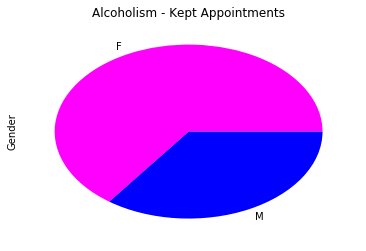

In [100]:
#bar chart for gender - seeing how many males vs females miss appointments vs keep appointments
colors = ['magenta', 'blue']
df_n['Gender'].value_counts().plot(kind='pie', colors=colors)
plt.title('Alcoholism - Kept Appointments');

In [162]:
df_n['Gender'].value_counts(normalize=True)

F    0.648992
M    0.351008
Name: Gender, dtype: float64

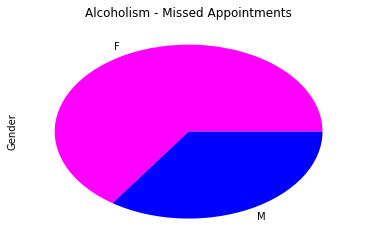

In [99]:
colors = ['magenta', 'blue']
df_y['Gender'].value_counts().plot(kind='pie', colors=colors)
plt.title('Alcoholism - Missed Appointments');

In [119]:
df_y['Gender'].value_counts(normalize=True)

F    0.653882
M    0.346118
Name: Gender, dtype: float64

##### When the sample is split into two groups, based on whether or not they showed up to their appointments, the gender distribution remained roughly the same as the entire sample.

### What is the relationship between alcoholism and missed appointments?

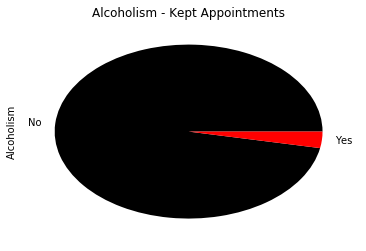

In [108]:
#bar charts and value counts for alcoholism
colors = ['Black', 'Red']
labels = ['No', 'Yes']
df_n['Alcoholism'].value_counts().plot(kind='pie', colors=colors, labels=labels)
plt.title('Alcoholism - Kept Appointments');

In [123]:
df_n['Alcoholism'].value_counts(normalize=True)

0    0.969583
1    0.030417
Name: Alcoholism, dtype: float64

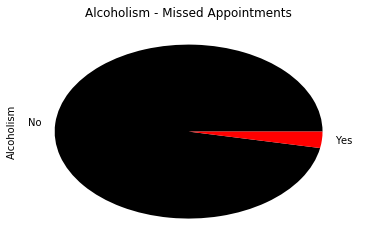

In [96]:
colors = ['Black', 'Red']
labels = ['No', 'Yes']
df_y['Alcoholism'].value_counts().plot(kind='pie', colors=colors, labels=labels)
plt.title('Alcoholism - Missed Appointments');

In [124]:
colors = ['Black', 'Red']
labels = ['No', 'Yes']
df_y['Alcoholism'].value_counts(normalize=True)

0    0.969667
1    0.030333
Name: Alcoholism, dtype: float64

##### When we divide the sample into those who missed vs. those who kept their appointments, the distribution of alcoholism stays roughly the same as the overall population. This was slightly surprising as I expected a higher proportion of patients with alcoholism would be present in the group that missed their appointments.

### What is the relationship between hypertension and missed appointments?

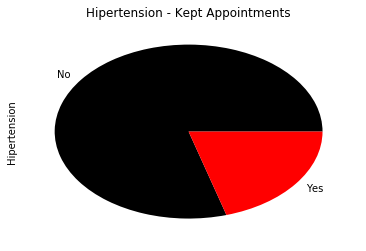

In [112]:
colors = ['Black', 'Red']
labels = ['No', 'Yes']
df_n['Hipertension'].value_counts().plot(kind='pie', colors=colors, labels=labels)
plt.title('Hipertension - Kept Appointments');

In [133]:
df_n['Hipertension'].value_counts(normalize=True)

0    0.795603
1    0.204397
Name: Hipertension, dtype: float64

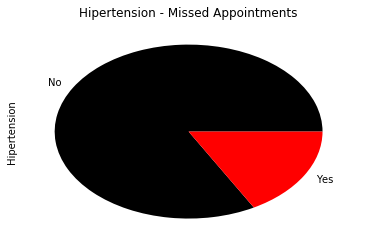

In [114]:
colors = ['Black', 'Red']
labels = ['No', 'Yes']
df_y['Hipertension'].value_counts().plot(kind='pie', colors=colors, labels=labels)
plt.title('Hipertension - Missed Appointments');

In [135]:
df_y['Hipertension'].value_counts(normalize=True)

0    0.830996
1    0.169004
Name: Hipertension, dtype: float64

##### When the sample was split into two groups, we notice that the group of patients who missed their appointments containted a smaller proportion of patients with hypertension (16%) and the group of patients who kept their appointments contained a larger proportion of patients with hypertension (20%) - this is a slightly higher proportion than the overall sample. This was not surprising to me because I expect patients who have high blood pressure to watch would want to stay on top of monitoring their health status .

### What is the relationship between diabetes and missed appointments?

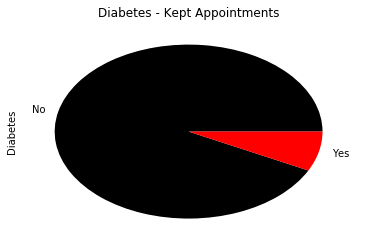

In [115]:
colors = ['Black', 'Red']
labels = ['No', 'Yes']
df_n['Diabetes'].value_counts().plot(kind='pie', colors=colors, labels=labels)
plt.title('Diabetes - Kept Appointments');

In [138]:
df_n['Diabetes'].value_counts(normalize=True)

0    0.926161
1    0.073839
Name: Diabetes, dtype: float64

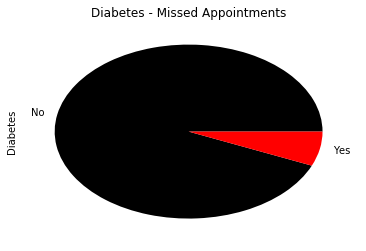

In [116]:
colors = ['Black', 'Red']
labels = ['No', 'Yes']
df_y['Diabetes'].value_counts().plot(kind='pie', colors=colors, labels=labels)
plt.title('Diabetes - Missed Appointments');

In [140]:
df_y['Diabetes'].value_counts(normalize=True)

0    0.935929
1    0.064071
Name: Diabetes, dtype: float64

##### Similarly to the groups discussed above, there was a lower proportion of patients with diabetes who missed their appointments (6.4%) than patients with diabetes who kept them (7.3%). In the entire sample, the proportion of patients with diabetes weas 7.1%

### What is the relationship between scholarship (welfare recipients) and missed appointments?

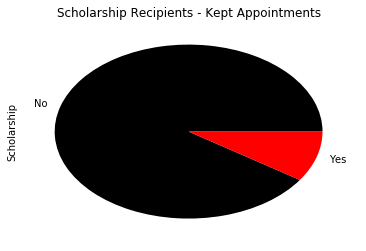

In [119]:
colors = ['Black', 'Red']
labels = ['No', 'Yes']
df_n['Scholarship'].value_counts().plot(kind='pie', colors=colors, labels=labels)
plt.title('Scholarship Recipients - Kept Appointments');

In [142]:
df_n['Scholarship'].value_counts(normalize=True)

0    0.906095
1    0.093905
Name: Scholarship, dtype: float64

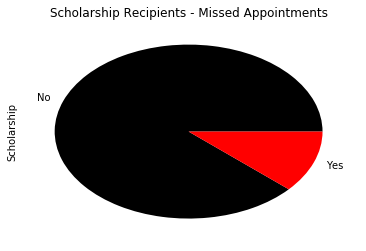

In [7]:
colors = ['Black', 'Red']
labels = ['No', 'Yes']
df_y['Scholarship'].value_counts().plot(kind='pie', colors=colors, labels=labels)
plt.title('Scholarship Recipients - Missed Appointments');

In [144]:
df_y['Scholarship'].value_counts(normalize=True)

0    0.884493
1    0.115507
Name: Scholarship, dtype: float64

##### In the entire sample, 9.8% of patients were on the Brazilian welfare system. In the sample of patients who missed their appointments, 11.6% of patients are on welfare. In the sample of patiens who kept their appointments, 9.4% of patients were on welfare. 

### What is the relationship between SMS text recieved and missed appointments?

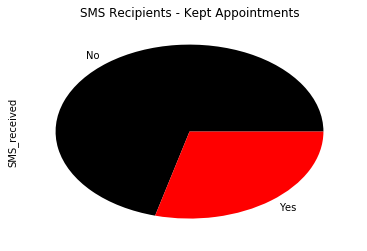

In [122]:
#bar charts and value counts for text recieved
colors = ['Black', 'Red']
labels = ['No', 'Yes']
df_n['SMS_received'].value_counts().plot(kind='pie', colors=colors, labels=labels)
plt.title('SMS Recipients - Kept Appointments');

In [148]:
df_n['SMS_received'].value_counts(normalize=True)

0    0.708659
1    0.291341
Name: SMS_received, dtype: float64

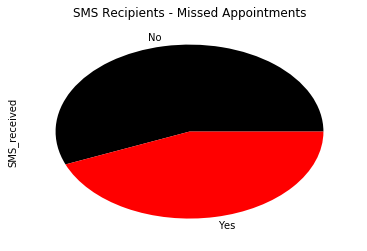

In [8]:
colors = ['Black', 'Red']
labels = ['No', 'Yes']
df_y['SMS_received'].value_counts().plot(kind='pie', colors=colors, labels=labels)
plt.title('SMS Recipients - Missed Appointments');

In [150]:
df_y['SMS_received'].value_counts(normalize=True)

0    0.561629
1    0.438371
Name: SMS_received, dtype: float64

##### Surprising, when we look at patients who recieved an SMS text about their appointment, a larger proportion of those patients are in the group that missed their appointment (44%)! In the group who kept their appointments, 29% received an SMS text. In the entire sample, 32% of patiens recieved an SMS message. 

<a id='conclusions'></a>
## Conclusions

> Overall, we had some interesting findings. The most surprising is in the group of patients who kept their appointments, a smaller percentage recieved an SMS text about their appointment than the group that missed their appointments. An unsurprising finding was that the sample of patients who missed their appointments tended to be younger than the patients who kept their appointments. 

> When it came to patients on welfare, the group of patients that missed their appointments had a higher percentage of patients on welfare than the group that kept their appointments and higher percentage of welfare recipients than the entire sample as well. In the group who kept their appointments, we find a higher proportion of patients with diabetes & hypertension, than in the group that missed appointments. Gender and Alcoholism proportions between the group of patients who kept their appointments and those who missed them did not differ from each other or from the entire sample. 

> This was a preliminary analysis that does not include any modeling or hypothesis testing, therefore it is important to note that we have no evidence of statistical significance even in characteristics where we see differences in proportions. 